In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem


# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
md = pd.read_csv(mouse_drug_data_to_load)
ct = pd.read_csv(clinical_trial_data_to_load)
print(md.head())
print(ct.head())

# Combine the data into a single dataset
combined = pd.merge(ct, md, how='outer', on='Mouse ID')

# Display the data table for preview
combined.head()


  Mouse ID      Drug
0     f234  Stelasyn
1     x402  Stelasyn
2     a492  Stelasyn
3     w540  Stelasyn
4     v764  Stelasyn
  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0     b128          0                45.0                 0
1     f932          0                45.0                 0
2     g107          0                45.0                 0
3     a457          0                45.0                 0
4     c819          0                45.0                 0


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint
# Convert to DataFrame
tv_mean = combined.groupby(['Drug', 'Timepoint'], as_index='False')['Tumor Volume (mm3)'].mean().reset_index()


# Convert to DataFrame
#COMPLETED VIA reset_index() above

# Preview DataFrame
tv_mean.head(15)


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


## Tumor Response to Treatment

In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tv_sem = combined.groupby(['Drug', 'Timepoint'], as_index='False')['Tumor Volume (mm3)'].sem().reset_index()


# Convert to DataFrame
#COMPLETED VIA reset_index() above

# Preview DataFrame
tv_sem.head(5)



,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [5]:
# Minor Data Munging to Re-Format the Data Frames
#mean
meanTv_pivot = tv_mean.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
#sem
semTv_pivot = tv_sem.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')


# Preview that Reformatting worked
meanTv_pivot.head(5)



Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [6]:
#Preview SEM pivot
semTv_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


In [7]:
x_axis = tv_sem['Timepoint'].unique()
x_axis

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45], dtype=int64)

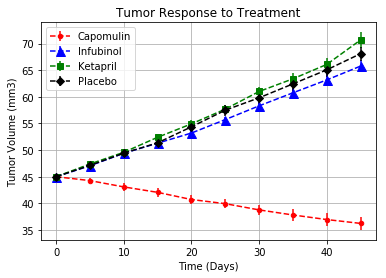

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.errorbar(x_axis, meanTv_pivot['Capomulin'], yerr=semTv_pivot['Capomulin'], marker='.', ls='--',color='r',markersize=9)
ax.errorbar(x_axis, meanTv_pivot['Infubinol'], yerr=semTv_pivot['Infubinol'], marker='^', ls='--',color='b',markersize=9)
ax.errorbar(x_axis, meanTv_pivot['Ketapril'], yerr=semTv_pivot['Ketapril'], marker='s', ls='--',color='g')
ax.errorbar(x_axis, meanTv_pivot['Placebo'], yerr=semTv_pivot['Placebo'], marker='D', ls='--',color='k')

ax.set_xlabel("Time (Days)")
ax.set_ylabel("Tumor Volume (mm3)")
plt.legend()
plt.grid(True)
plt.title('Tumor Response to Treatment')
plt.savefig('TumorVolumeResponse.png')

## Metastatic Response to Treatment

In [12]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
ms_mean = combined.groupby(['Drug', 'Timepoint'], as_index='False')['Metastatic Sites'].mean().reset_index()


# Convert to DataFrame
#COMPLETED VIA reset_index() above

# Preview DataFrame
ms_mean.head(5)


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [13]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
ms_sem = combined.groupby(['Drug', 'Timepoint'], as_index='False')['Metastatic Sites'].sem().reset_index()


# Convert to DataFrame
#COMPLETED VIA reset_index() above

# Preview DataFrame
ms_sem.head(5)


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [14]:
# Minor Data Munging to Re-Format the Data Frames
#mean
meanMs_pivot = ms_mean.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')
#sem
semMs_pivot = ms_sem.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')

# Preview that Reformatting worked
meanMs_pivot.head(5)


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [15]:
x_axis = ms_sem['Timepoint'].unique()
x_axis

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45], dtype=int64)

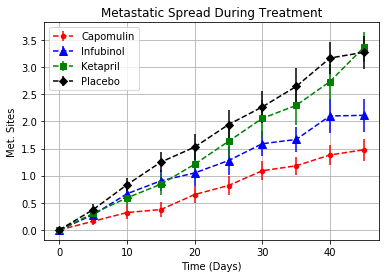

In [17]:
# Generate the Plot (with Error Bars)

fig = plt.figure()
ax = fig.add_subplot(111)

ax.errorbar(x_axis, meanMs_pivot['Capomulin'], yerr=semMs_pivot['Capomulin'], marker='.', ls='--',color='r',markersize=9)
ax.errorbar(x_axis, meanMs_pivot['Infubinol'], yerr=semMs_pivot['Infubinol'], marker='^', ls='--',color='b',markersize=8)
ax.errorbar(x_axis, meanMs_pivot['Ketapril'], yerr=semMs_pivot['Ketapril'], marker='s', ls='--',color='g')
ax.errorbar(x_axis, meanMs_pivot['Placebo'], yerr=semMs_pivot['Placebo'], marker='D', ls='--',color='k')

ax.set_xlabel("Time (Days)")
ax.set_ylabel("Met. Sites")
plt.legend()
plt.grid(True)
plt.title('Metastatic Spread During Treatment')
plt.savefig('MetastaticResponse.png')


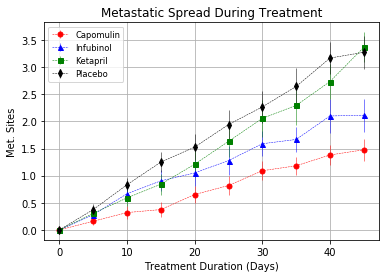

## Survival Rates

In [19]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
sr_count = combined.groupby(['Drug', 'Timepoint'], as_index='False')['Metastatic Sites'].count().reset_index()


# Convert to DataFrame
#COMPLETED VIA reset_index() above
sr_count.rename(columns={'Metastatic Sites':"Mouse Count"}, inplace='True')
# Preview DataFrame
sr_count.head(5)


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [20]:
# Minor Data Munging to Re-Format the Data Frames
sr_count_pivot = sr_count.pivot(index='Timepoint', columns='Drug', values='Mouse Count')
# Preview the Data Frame
sr_count_pivot.head(11)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


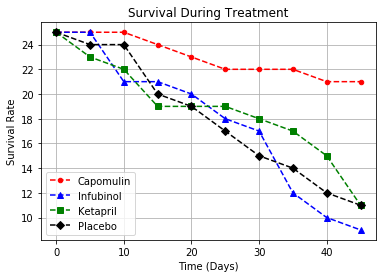

In [21]:
# Generate the Plot (Accounting for percentages)
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(x_axis, sr_count_pivot['Capomulin'], marker='.', ls='--',color='r',markersize=9)
ax.plot(x_axis, sr_count_pivot['Infubinol'], marker='^', ls='--',color='b')
ax.plot(x_axis, sr_count_pivot['Ketapril'], marker='s', ls='--',color='g')
ax.plot(x_axis, sr_count_pivot['Placebo'], marker='D', ls='--',color='k')

ax.set_xlabel("Time (Days)")
ax.set_ylabel("Survival Rate")
plt.legend()
plt.grid(True)
plt.title('Survival During Treatment')
plt.savefig('SurvivalDuringTreatment.png')

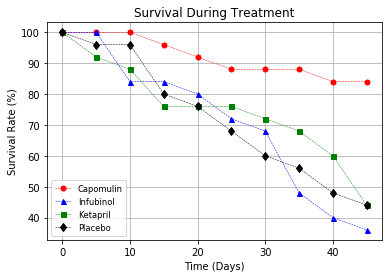

## Summary Bar Graph

In [22]:
#Calculate
tv_chg = tv_mean.loc[tv_mean['Timepoint'] == 45]

tv_chg.columns = ['Drug', 'min', 'end']

tv_chg['PctChg'] = ((tv_chg['end']/45.00)*100)-100

tv_chg.head()

,Drug,min,end,PctChg
9,Capomulin,45,36.236114,-19.475303
19,Ceftamin,45,64.132421,42.516492
29,Infubinol,45,65.755562,46.123472
39,Ketapril,45,70.662958,57.028795
49,Naftisol,45,69.265506,53.923347


In [23]:
#Select Drugs of interest
df_bar = tv_chg[(tv_chg.Drug.str.contains('Capomulin')) | (tv_chg.Drug.str.contains('Infubinol')) | (tv_chg.Drug.str.contains('Ketapril')) | (tv_chg.Drug.str.contains('Placebo'))]
df_bar

,Drug,min,end,PctChg
9,Capomulin,45,36.236114,-19.475303
29,Infubinol,45,65.755562,46.123472
39,Ketapril,45,70.662958,57.028795
59,Placebo,45,68.084082,51.297960


In [24]:
# Store all Relevant Percent Changes into a Tuple
subset = tv_chg[['PctChg']]
tuples = [tuple(x) for x in subset.values]
print(str(tuples))

# Splice the data between passing and failing drugs
val = df_bar['PctChg'].tolist()
pos_list = [item if item >= 0 else item*0 for item in val]
neg_list = [item if item < 0 else item*0 for item in val]

#labels for tick marks
x_label = df_bar['Drug'].tolist()

# print lists to verify data
print(str(val))
print(str(pos_list))
print(str(neg_list))


[(-19.475302667894155,), (42.516491855897414,), (46.123471727851836,), (57.028794686606034,), (53.92334713476919,), (51.29796048315151,), (47.24117486320634,), (-22.32090046276666,), (52.085134287898995,), (46.579750865095235,)]
[-19.475302667894155, 46.123471727851836, 57.028794686606034, 51.29796048315151]
[-0.0, 46.123471727851836, 57.028794686606034, 51.29796048315151]
[-19.475302667894155, 0.0, 0.0, 0.0]


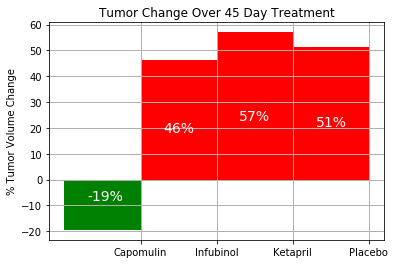

In [25]:
x = range(4)
ticks = range(1,5)
fig = plt.figure()
ax = plt.subplot(111)
ax.set_title('Tumor Change Over 45 Day Treatment')
ax.bar(x, neg_list, width=1, align='edge', color='g')
ax.bar(x, pos_list, width=1, align='edge', color='r')
ax.grid(linewidth=1)
ax.set_xticks(ticks, minor=False)
ax.set_xticklabels(x_label, minor=False)
ax.grid(which='minor', axis='both')
plt.grid(True)
plt.ylabel("% Tumor Volume Change")
#labels
labels = val
for i in x:
    plt.text(x = x[i]+0.3, y = val[i]*0.4, s = str(int(labels[i])) + "%", size = 14, color='w')

    # Save the Figure
plt.savefig('TumorVolChange_Bar.png')


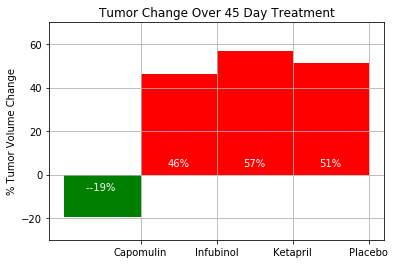